# Google Playstore Analysis

# 1. Importing the required packages.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import mannwhitneyu

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Data

In [3]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. Data Preprocessing

# 3.1 Handling NULL Values

This is a very crucial step in every analysis and model, which on doing, improves the accuracy of insights and predictions.

In [4]:
print(df.isnull().sum())
df.dropna(inplace=True) 
#Dropping Rows with Null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [5]:
#Removing Duplicate entries
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(8886, 13)

After removing the rows with Null values and the duplicate entries, We have got 8886 apps to analyze for their ratings and performance.

# 3.2 Handling Data Types of each Feature

The data types of each feature must be changed to a proper format that can be used for analysis.

In [13]:
df.dtypes  
# Displaying Data types of each feature.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
df.Reviews = df.Reviews.astype('int64')
#Changing the feature Reviews to int type.

In [20]:
#Other Features like Size, Installs, Price and Android Vers also must be of numeric type.
#The values they are holding must be changed to a proper format so that we can use them for analysis and plots.
#Example : '10000+' to 10000

newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [21]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [22]:
newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [23]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

# 4. Analyzing Features 

# 4.1 Categories

Displaying all the categories and their counts.

In [27]:
df.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

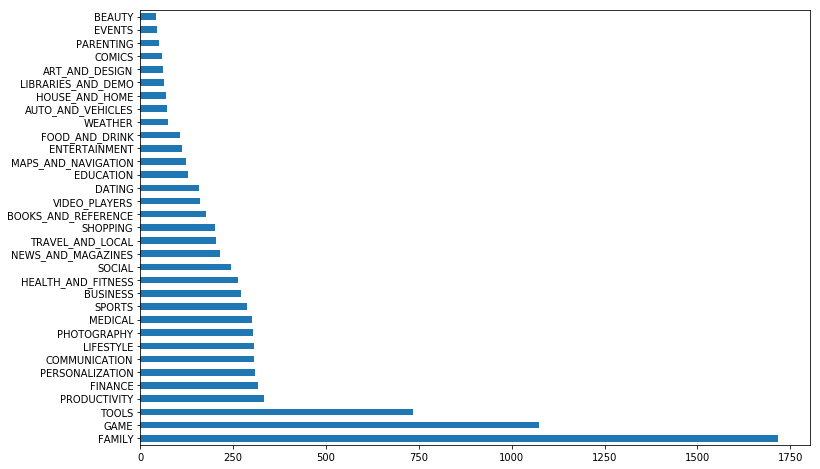

In [28]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

# Insight : Maximum Number of Apps belong to the Family and Game Category.

# 4.2 Rating

In [34]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

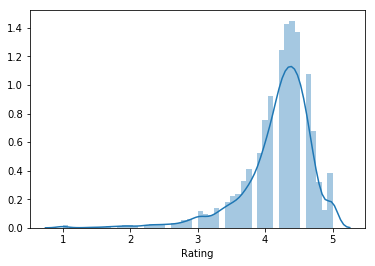

In [35]:
sns.distplot(df.Rating)
#Distribution Plot of 'Rating'

# Insight : Most of the apps, clearly hold a rating above 4.0 . And surprisingly a lot seem to have 5.0 rating.

In [38]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


There are 271 Apps in the store which hold 5.0 Ratings. Further analysis can be done to check if the apps actually desrve the rating or not

# 4.3 Reviews

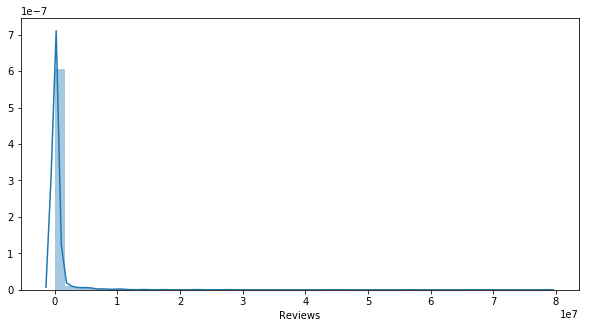

In [40]:
#Distribution Plot of the feature Reviews
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

In [42]:
#Apps which have a good amount of Reviews.
df[df.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,0.0
1670,Clash of Clans,GAME,4.6,44891723,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
1879,Clash of Clans,GAME,4.6,44893888,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.0
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917,0.0,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,0.0


# Insight : The most famous Apps like WhatsApp, Facebook and Clash of Clans are the most reviewed Apps as shown above.

# 4.4 Type

([<matplotlib.patches.Wedge at 0x2110dd71828>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

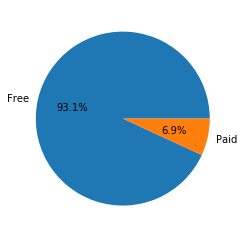

In [44]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

# Insight: 93% of the Apps are Free in the Play Store.

# 4.5 Price

In [47]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.0


# Insight : The most costly App in the Store is: I'm Rich - Trump Edition costing 400 Dollars.

# 4.6 Android Version

In [50]:
df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

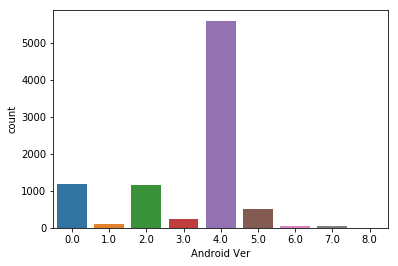

In [51]:
#Count Plot of the various Versions
sns.countplot(df['Android Ver'])

# Insight : Most of the apps support Android 4.0 and above.

# 5. Furthur Analysis

Looking at the Apps with 5.0 ratings:

In [52]:
df_full = df[df.Rating == 5]
df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0


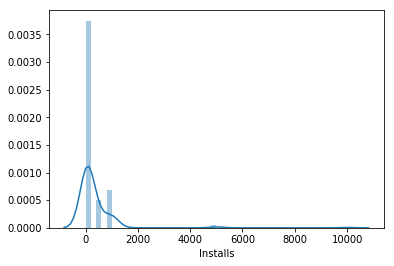

In [53]:
#Distribution plot of 'Installs' of Apps with 5.0 Ratings
sns.distplot(df_full.Installs)

In [55]:
df_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

# Insight : There are many Apps that have full ratings but less downloads/installs. So we can't really consider those apps as the best ones.

Consider the Apps with 5.0 Ratings and Maximum Installs :

In [58]:
df_full_maxinstalls = df_full[df.Installs > 1000]
df_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0
8058,Oración CX,LIFESTYLE,5000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0


Checking the No. of Reviews of 5.0 Rating Apps

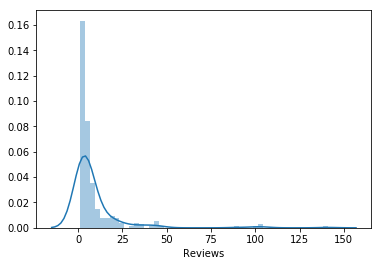

In [59]:
sns.distplot(df_full.Reviews)

The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading.Hence filter out the ones with more than 30 reviews. These filtered ones are the apps that really stand for 5.0 rating.

In [60]:
df_full = df_full[df.Reviews > 30]

In [62]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


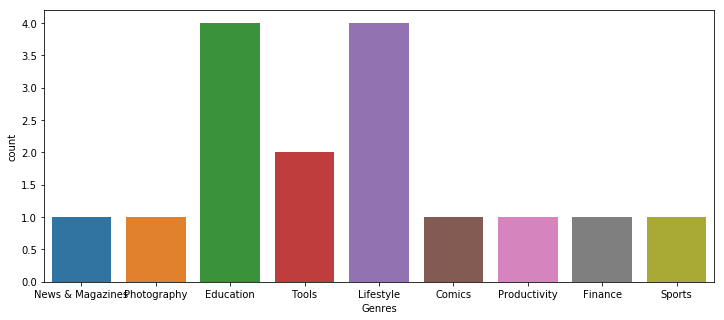

In [64]:
plt.figure(figsize=(12,5))
sns.countplot(df_full.Genres)

# Insight : Apps related to Education, LifeStyle and Tools seem to fetch full Ratings with sufficient number of reviews.

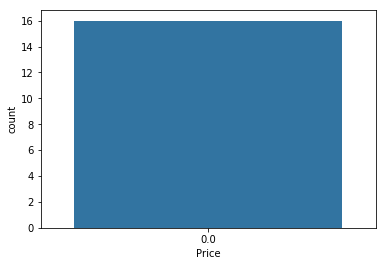

In [65]:
sns.countplot(df_full.Price)

# Insight : All the Apps with 5.0 ratings are Free to install.

,Rating,Reviews,Size,Installs,Price,Android Ver
count,8886.000000,8.886000e+03,8886.000000,8.886000e+03,8886.000000,8886.000000
mean,4.187959,4.730928e+05,31.381747,1.650061e+07,0.963526,3.229912
std,0.522428,2.906007e+06,87.911809,8.640413e+07,16.194792,1.521531
min,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000
25%,4.000000,1.640000e+02,3.100000,1.000000e+04,0.000000,2.000000
50%,4.300000,4.723000e+03,11.000000,5.000000e+05,0.000000,4.000000
75%,4.500000,7.131325e+04,31.000000,5.000000e+06,0.000000,4.000000
max,5.000000,7.815831e+07,994.000000,1.000000e+09,400.000000,8.000000


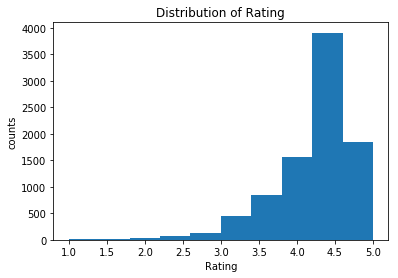

In [77]:
def plot_hist(df, col, bins=10):
    """
    Plot histograms for a column
    """
    plt.hist(df[col], bins=bins)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.title('Distribution of {}'.format(col))
    
def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def drop_categories(df):
    """
    Drop categories with any app type with instances fewer than 10
    """
    vc_rating = df.Category.value_counts()
    cats_to_drop = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        if n_free < 10 or n_paid < 10:
            cats_to_drop.append(cat)
    for cat in cats_to_drop:
        df.drop(df.query('Category == "{}"'.format(cat)).index, axis=0, inplace=True)
    print("Deleted categories: {}".format(cats_to_drop))
    return df

# Describe Rating dataframe
plot_hist(df, 'Rating')
df.describe()

In [72]:
print("There are {} free and {} paid apps in the the Rating dataframe ".format(*compute_app_types(df)))

There are 8275 free and 611 paid apps in the the Rating dataframe 


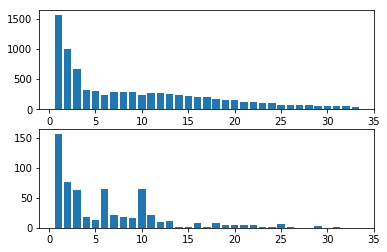

In [73]:
# explore the distributions of free and paid apps across different categories
plot_app_types(df)

How does the ratings differ in general?

In [74]:
def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))    
    return stats

Free app has average Rating 4.182513595166167
Paid app has average Rating 4.261702127659572
Mean rating: 4.187958586540634


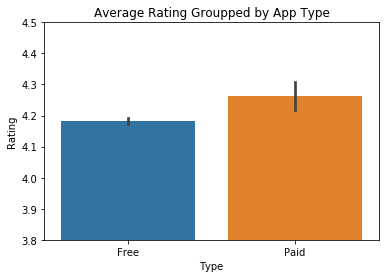

In [76]:
stats = plot_target_by_group(df, 'Rating', 'Type', title="Average Rating Groupped by App Type")
for i, s in zip(stats.index, stats):
    print("{} app has average {} {}".format(i, 'Rating',s))
mean_rating = df.Rating.mean()
print("Mean rating: {}".format(mean_rating))

# Insight: In general, Free apps, with an average rating of 4.18, are lower rated than Paid apps with an average rating of 4.26. 